# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import normaltest, norm, mannwhitneyu
import matplotlib.pyplot as plt

# Importando base dados

In [2]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Distribuição e frequência

## Sexo

In [3]:
frequencia = dados['Sexo'].value_counts()
porcentagem = (dados['Sexo'].value_counts(normalize=True) * 100).round(2)

In [4]:
dist_freq = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': porcentagem})
dist_freq.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_freq.rename_axis('Sexo', axis='columns', inplace=True)
dist_freq

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.3
Feminino,23590,30.7


## Sexo e cor

In [5]:
sexo = {0: 'Masculino', 
        1: 'Feminino'}

cor = {0: 'Indígena', 
       2: 'Branca', 
       4: 'Preta', 
       6: 'Amarela', 
       8: 'Parda', 
       9: 'Sem declaração'}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

### Frequência

In [6]:
frequencia = pd.crosstab(dados.Sexo, dados.Cor)
frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [7]:
homens = dados.query('Sexo == 0').Sexo.count()
mulheres = dados.query('Sexo == 1').Sexo.count()
print(f'Quantidade de homens: {homens}')
print(f'Quantidade de mulheres: {mulheres}')

Quantidade de homens: 53250
Quantidade de mulheres: 23590


A maior parte dos entrevistados são homens, a maioria da cor branca e parda. A minoria sendo de origem indígena e cor amarela. A mesma situação se aplica ao sexo feminino.

### Porcentagem

In [8]:
porcentagem = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
porcentagem.rename(index=sexo, inplace=True)
porcentagem.rename(columns=cor, inplace=True)
porcentagem

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


### Renda

In [9]:
renda = pd.crosstab(dados.Sexo, dados.Cor, aggfunc='mean', values=dados.Renda).round(2)
renda.rename(index=sexo, inplace=True)
renda.rename(columns=cor, inplace=True)
renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


Os homens de cor amarela possuem a maior média e renda dentre os grupos estudados, e a menor confere aos homens de origem indígena. Por meio dessa tabela, já é possível notar, além da diferença de renda entre as raças, a diferença entre os gêneros.

### Dividindo por classes

In [10]:
print(dados.Renda.max())
print(dados.Renda.min())

200000
0


Sálario minimo de 2015 = 788,00 reais

In [11]:
sm = 788
classes = [0, 2*sm, 4*sm, 10*sm, 20*sm, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [12]:
frequencia = pd.value_counts(pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [13]:
percentual = (pd.value_counts(pd.cut(x=dados.Renda, bins=classes, labels=labels, include_lowest=True), normalize=True) * 100).round(2)
percentual

E    64.75
D    21.73
C     9.89
B     2.83
A     0.79
Name: Renda, dtype: float64

In [14]:
dist_freq_quantitativas_personalizadas = pd.DataFrame({'Frequência': frequencia, 'Percentuaal (%)': percentual})
dist_freq_quantitativas_personalizadas.sort_index(ascending=False)

,Frequência,Percentuaal (%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


A desigualdade de renda no Brasil é bem expressiva, com 65% da população entrevistada com renda de até dois salários minimos, 1576.00 reias por mês. Apenas 0.79% da população recebe acima de 20 salários minimos, 15760.00 reais.

## Distribuição para classes fixas

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [15]:
k = 1 + (10/3)*np.log10(dados.shape[0])
k = int(k.round())
k

17

In [16]:
frequencia = pd.value_counts(pd.cut(x=dados.Renda, bins=k, include_lowest=True), sort=False)
frequencia = frequencia.to_frame()
frequencia.rename_axis('Renda', axis='columns', inplace=True)
frequencia.rename(columns={'Renda': 'Frequência'}, inplace=True)
frequencia

Renda,Frequência
"(-200.001, 11764.706]",75594
"(11764.706, 23529.412]",1022
"(23529.412, 35294.118]",169
"(35294.118, 47058.824]",19
"(47058.824, 58823.529]",16
"(58823.529, 70588.235]",5
"(70588.235, 82352.941]",4
"(82352.941, 94117.647]",1
"(94117.647, 105882.353]",6
"(105882.353, 117647.059]",0


# Histograma

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Metros', ylabel='Count'>

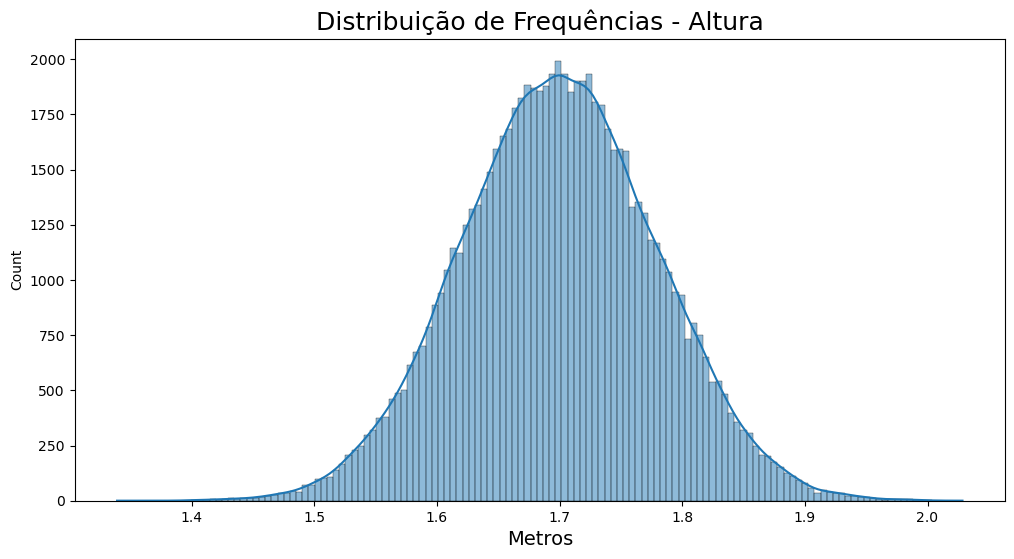

In [17]:
ax = sns.histplot(dados.Altura, kde=True)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

Os registros referentes a altura, apresentam um comportamento de distribuição normal.

<AxesSubplot:>

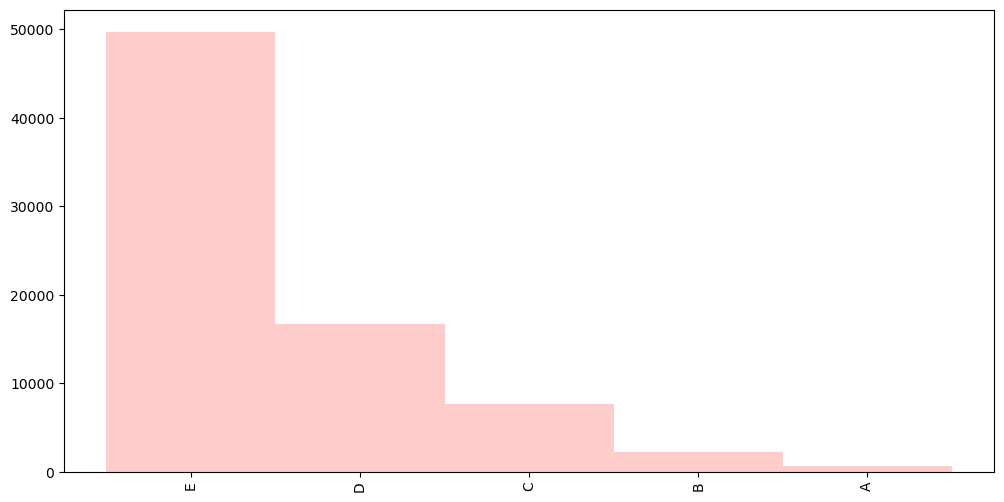

In [18]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color='red', alpha=0.2, figsize=(12,6))

O histograma apresenta novamente, a desigualdade de renda no Brasil em 2015, onde a maioria das pessoas recebem até 2 salários minimos.

## Avaliando a variável - Renda

C:\Users\milan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


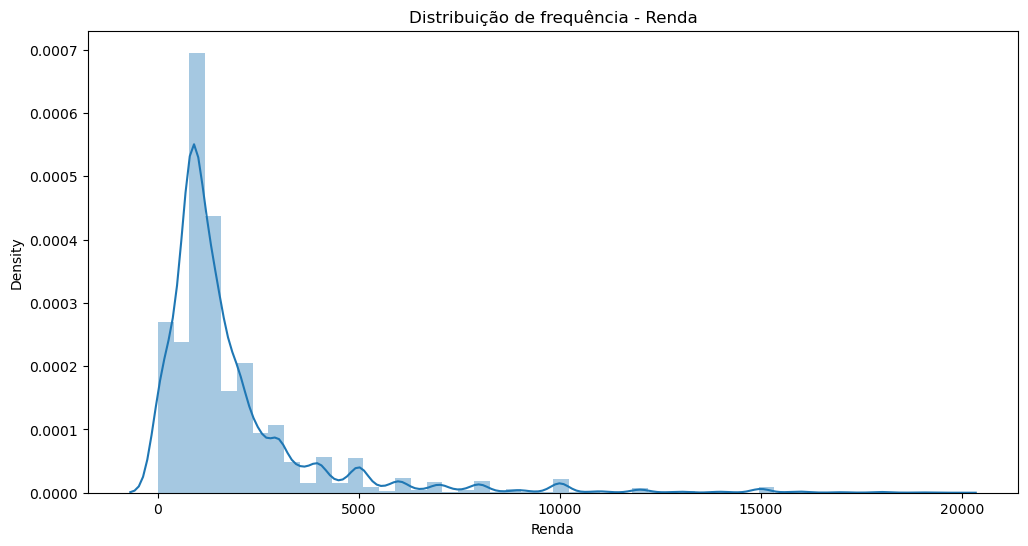

In [19]:
ax = sns.distplot(dados.query('Renda < 20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequência - Renda')
ax=ax

In [20]:
print(f'A moda da variável "Renda" é: {dados.Renda.mode()[0]}')
print(f'A mediana da variável "Renda" é: {dados.Renda.median()}')
print(f'A média da variável "Renda" é: {dados.Renda.mean():.2f}')

A moda da variável "Renda" é: 788
A mediana da variável "Renda" é: 1200.0
A média da variável "Renda" é: 2000.38


A distribuição da renda apresenta uma curva assimétrica a direita, sendo a média maior que a mediana, que é maior que a moda. O valor mais frequente no dataset é justamente o valor do salário minimo, de 788 reais.

## Avaliando a variável - Altura

C:\Users\milan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


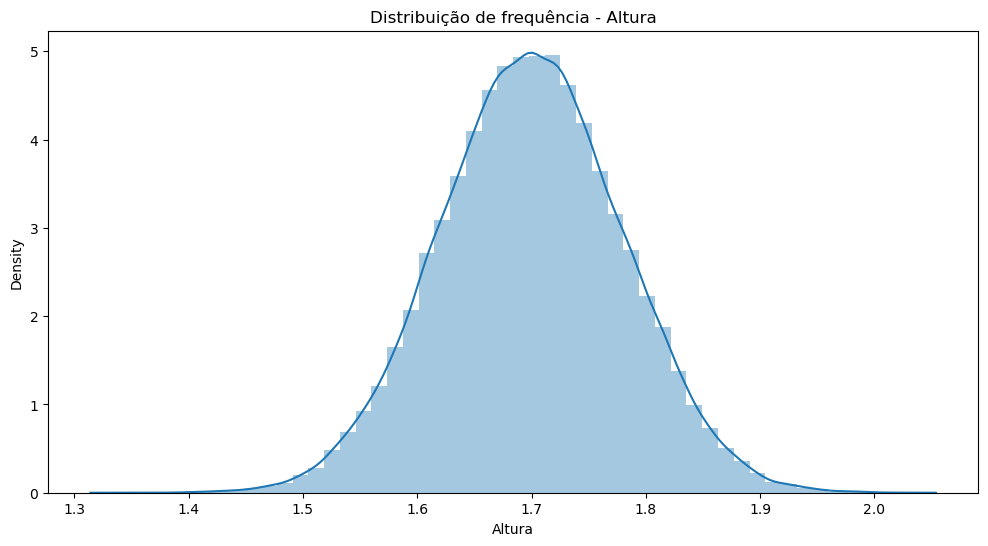

In [21]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência - Altura')
ax=ax

In [22]:
print(f'A moda da variável "Altura" é: {dados.Altura.mode().mean()}')
print(f'A mediana da variável "Altura" é: {dados.Altura.median()}')
print(f'A média da variável "Altura" é: {dados.Altura.mean()}')

A moda da variável "Altura" é: 1.7066552394444443
A mediana da variável "Altura" é: 1.6993247325
A média da variável "Altura" é: 1.6995124540575812


A distribuição de frequência de altura segue o comportamento de uma distribuição normal, onde a média, a mediana e a moda são aproximadamente iguais, no valor de 1.70 metros.

## Avaliando a variável - Anos de estudo

C:\Users\milan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


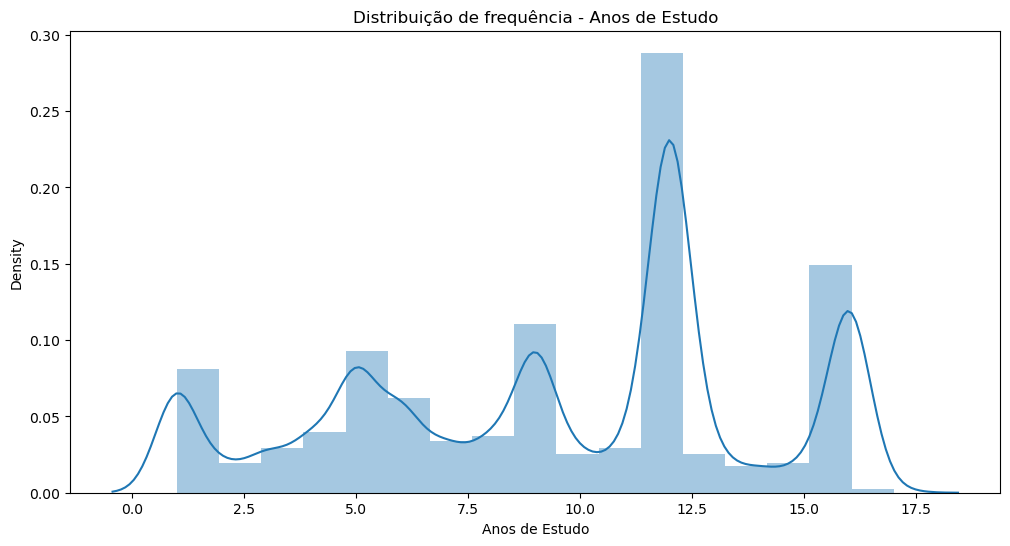

In [23]:
ax = sns.distplot(dados['Anos de Estudo'], bins = 17)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência - Anos de Estudo')
ax=ax

In [24]:
moda = dados['Anos de Estudo'].mode()[0]
mediana = dados['Anos de Estudo'].median()
media = dados['Anos de Estudo'].mean()

In [25]:
print(f'A moda da variável "Anos de Estudo" é: {moda}')
print(f'A mediana da variável "Anos de Estudo" é: {mediana}')
print(f'A média da variável "Anos de Estudo" é: {media:.2f}')

A moda da variável "Anos de Estudo" é: 12
A mediana da variável "Anos de Estudo" é: 11.0
A média da variável "Anos de Estudo" é: 9.47


A distribuição de frequência dos anos de estudo, apresenta uma assimetria a esquerda, onde a moda é maior que a mediana, que é maior que a média.

## Distribuição de frequência acumulada

C:\Users\milan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


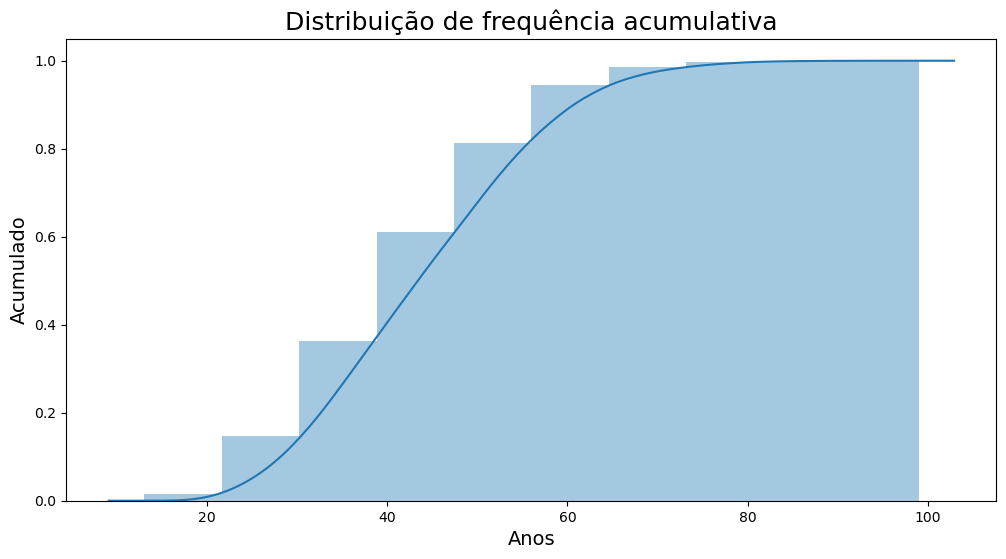

In [26]:
ax = sns.distplot(dados.Idade, hist_kws={'cumulative': True}, kde_kws={'cumulative': True},
                 bins=10)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequência acumulativa', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Acumulado', fontsize=14)
ax=ax

# Boxplot

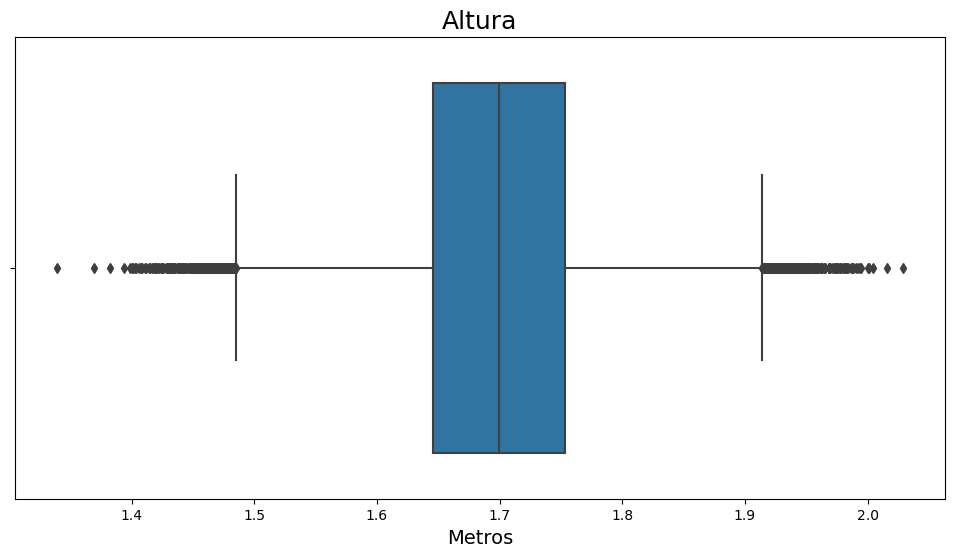

In [27]:
ax = sns.boxplot(x='Altura', data=dados)
ax.figure.set_size_inches(12, 6)
ax.set_title('Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax=ax

A forma do gráfico boxplot, também remete a uma distribuição normal.

## Boxplot - Sexo

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

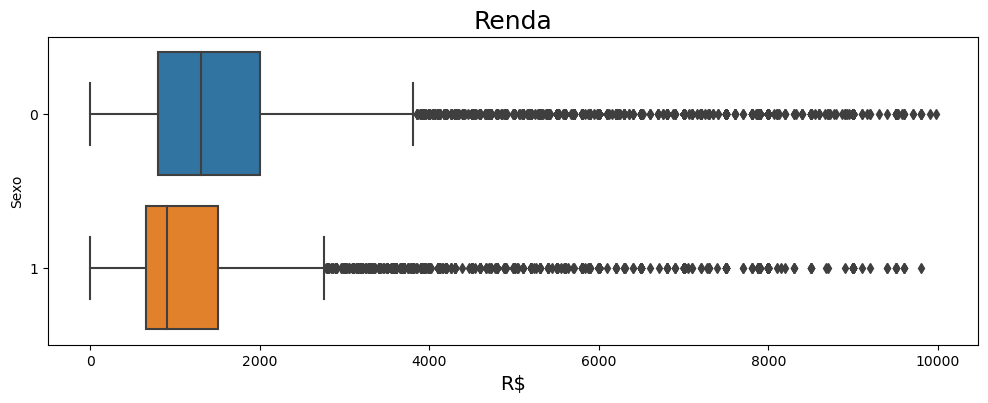

In [28]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax=ax

A desigualdade de renda entre gêneros é bem notória com o gráfico de boxplot. Quase 50% dos homens ganham mais que 75% das mulheres. O primeiro quartil relacionado ao sexo masculino, tem quase o mesmo valor que a mediana do sexo feminino.

## Boxplot - Anos de Estudo

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

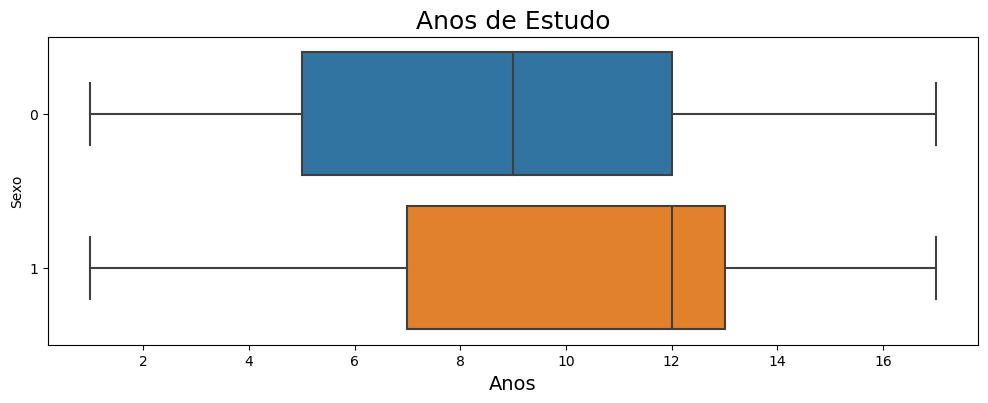

In [29]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax=ax

Mesmo com o sexo feminino possuindo mais anos de estudo em relação ao sexo masculino, ainda assim, há o comportamento apresentado no gráfico anterior, o que mostra a existência de um patriarcado na sociedade, pois mesmo com mais capacitação, as mulheres recebem menos que os homens. Para esse gráfico, a situação inverte, 50% das mulheres tem mais anos de estudo, do que 75% dos homens.

## Boxplot - Raça/Renda

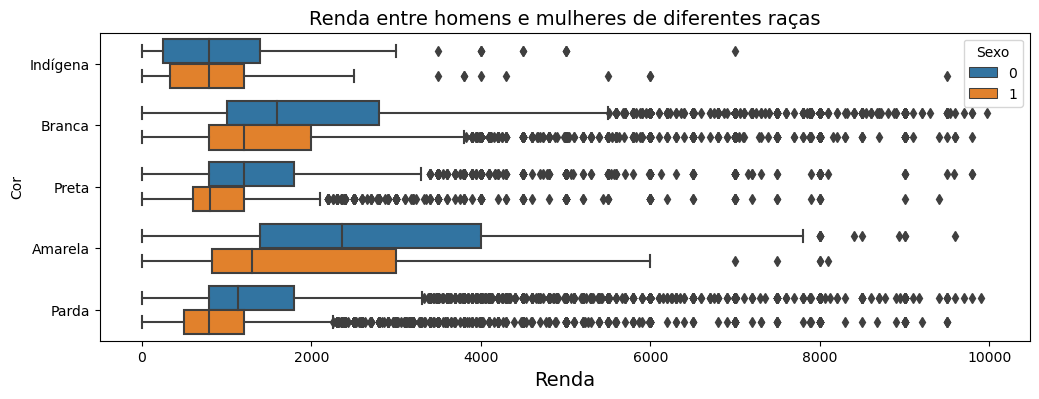

In [30]:
ax = sns.boxplot(data=dados.query('Renda < 10000'), x='Renda', y='Cor', hue='Sexo', orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Renda entre homens e mulheres de diferentes raças', fontsize=14)
ax.set_xlabel('Renda', fontsize=14)
ax.set_yticklabels([v for k, v in cor.items() if k % 2 == 0])
ax=ax

Como concluído anteriormente, homens da cor amarela, possuem a maior renda entre os grupos estudados. Enquanto, os grupos indígenas tem a menor média de renda. Quase 50% da população tem renda menor do que a maioria das outras raças e gêneros.

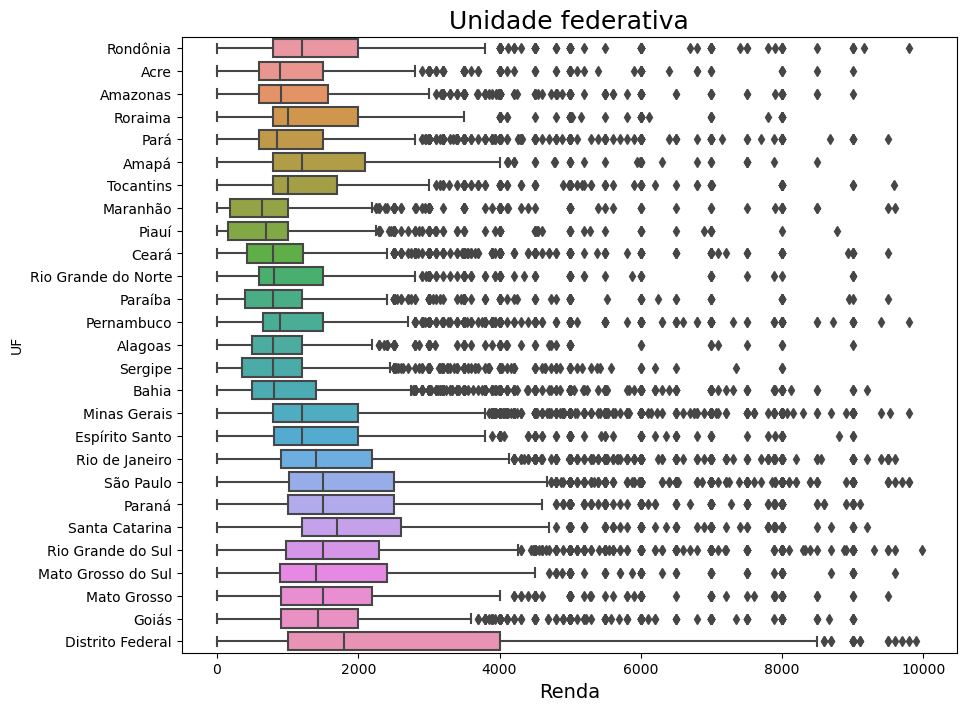

In [31]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(10, 8)
ax.set_title('Unidade federativa', fontsize=18)
ax.set_xlabel('Renda', fontsize=14)
ax.set_yticklabels([k for k in uf.values()])
ax=ax

O estado com a melhor média de renda, é o distrito federal, com uma certa margem de folga. Em seguida, vem Santa Catarina e São Paulo. O ultimo, é o estado mais rico do pais, porém possui uma população muito maior que os outros estados, fazendo com que a média caia. As menores médias de renda são dos estados do Maranhão e do Piauí, sendo dois estados, considerados pobres. A região nordeste apresentou a pior média, enquanto o sul e o sudeste a maior média.

# Probabilidade

## Testando se a variável "Renda" se comporta como uma normal

In [32]:
significancia = 0.05
x, p_valor = normaltest(dados.Renda)
if p_valor <= significancia:
    print('A variável "Renda" não se comporta como uma normal')
else:
    print('A variável "Renda" se comporta como uma normal')

A variável "Renda" não se comporta como uma normal


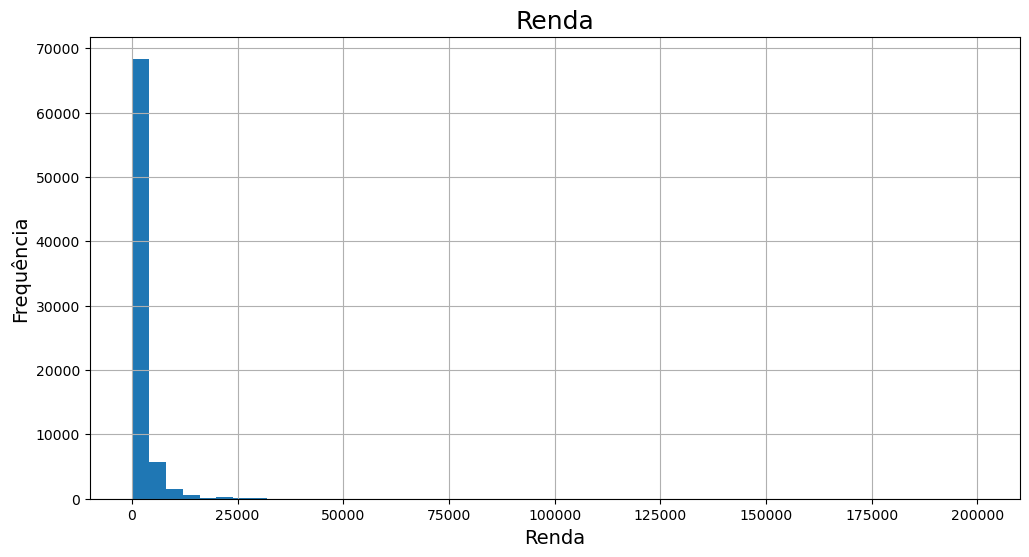

In [33]:
ax = dados.Renda.hist(bins=50)
plt.title('Renda', fontsize=18)
plt.xlabel('Renda', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
ax.figure.set_size_inches(12, 6)
ax=ax

O histograma confirma que a variável "Renda", não se comporta como uma normal, e sim como uma curva com assimetria a direita

## Testando se a variável "Altura" se comporta como uma normal

In [34]:
x, p_valor = normaltest(dados.Altura)
if p_valor <= significancia:
    print('A variável "Altura" não se comporta como uma normal')
else:
    print('A variável "Altura" se comporta como uma normal')

A variável "Altura" se comporta como uma normal


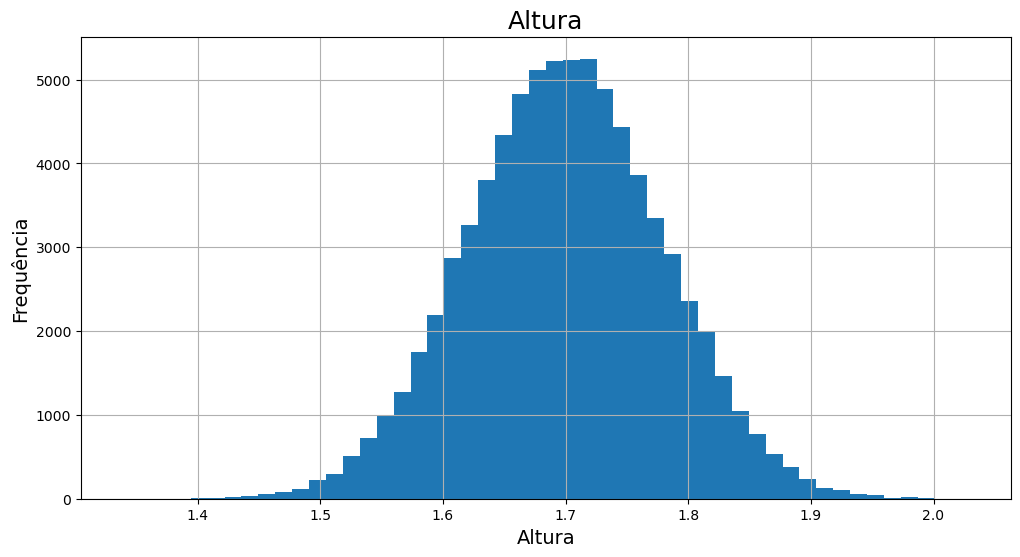

In [35]:
ax = dados.Altura.hist(bins=50)
plt.title('Altura', fontsize=18)
plt.xlabel('Altura', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
ax.figure.set_size_inches(12, 6)
ax=ax

O histograma acima, confirma que a variável "Altura" se comporta como uma normal.

## Teste de hipótese para a distribuição de renda entre homens e mulheres

### Seleção da amostra de 500 registros

In [36]:
homens = dados.query('Sexo == 0').sample(n=500, random_state=101).Renda
mulheres= dados.query('Sexo == 1').sample(n=500, random_state=101).Renda

In [37]:
media_amostra_M = mulheres.mean()
desvio_padrao_amostra_M = mulheres.std()
print(media_amostra_M)
print(desvio_padrao_amostra_M)

1357.528
1569.9011907484578


In [38]:
media_amostra_H = homens.mean()
desvio_padrao_amostra_H = homens.std()
print(media_amostra_H)
print(desvio_padrao_amostra_H)

2142.608
2548.050802499875


In [39]:
significancia = 0.01
confianca = 1 - significancia
n_M = 500
n_H = 500
D_0 = 0

### H0 → A média de renda dos homens é menor ou igual a das mulheres
### H1 → A média de renda dos homens é maior em relação as mulheres

O tamanho da amostra e maior que 30 e o desvio padrão populacional é desconhecido, logo será usado a variável padrão "Z" e o desvio padrão amostral.

## Calculo o Z Alpha

In [40]:
probabilidade = confianca
z_alpha = norm.ppf(probabilidade)
z_alpha.round(2)

2.33

## Calculo estatística teste

In [41]:
numerador = (media_amostra_H - media_amostra_M) - D_0
denominador = np.sqrt((desvio_padrao_amostra_H ** 2 / n_H) + (desvio_padrao_amostra_M ** 2 / n_M))
z = numerador / denominador
z

5.86562005776475

In [42]:
if z >= z_alpha:
    print('Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.')
else:
    print('Com 99% de nível de significância, H0 é aceito e a média de Renda do sexo masculino é menor ou igual ao sexo feminino.')

Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.


### Há outras formas de se calcular

In [43]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

#### DescrStatsW

In [44]:
test_H = DescrStatsW(homens)
test_M = DescrStatsW(mulheres)
test_A = test_H.get_compare(test_M)
z, p_valor = test_A.ztest_ind(alternative='larger', value=0)
if p_valor <= significancia:
    print('Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.')
else:
    print('Com 99% de nível de significância, H0 é aceito e a média de Renda do sexo masculino é menor ou igual ao sexo feminino.')

Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.


#### CompareMeans

In [45]:
test_B = CompareMeans(test_H, test_M)
z, p_valor = test_B.ztest_ind(alternative='larger', value=0)
if p_valor <= significancia:
    print('Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.')
else:
    print('Com 99% de nível de significância, H0 é aceito e a média de Renda do sexo masculino é menor ou igual ao sexo feminino.')

Com 99% de nível de significância, H0 é rejeitado e a média de Renda do sexo masculino é maior que o sexo feminino.


Ambos os métodos retornam o mesmo resultado.

## Comparação de duas populações - amostras independentes

### Teste de Mann-Whitney

Duas amostras aleatórias, uma de **6 homens** e outra com **8 mulheres**. Com o objetivo de comprovar tal desigualdade, foi **testado a igualdade das médias** entra estas duas amostras com um nível de **significância de 5%**.

#### Seleção das amostras

In [46]:
mulheres = dados.query('Sexo == 1 and Renda > 0').sample(n = 8, random_state = 101).Renda
media_amostra_M = mulheres.mean()

In [47]:
homens = dados.query('Sexo == 0 and Renda > 0').sample(n = 6, random_state = 101).Renda
media_amostra_H = homens.mean()

In [48]:
significancia = 0.05
confianca = 1 - significancia
n_1 = len(homens)
n_2 = len(mulheres)

#### H0 → A média de renda das mulheres é igual ao dos homens.
#### H1 → A média de renda das mulheres é menor que a dos homens

O tamanho da amostra é menor que 30, e o desvio padrão populacional é desconhecido, logo a distribuição t-student será utilizada.

In [49]:
u, p_valor = mannwhitneyu(mulheres, homens, alternative='less')
if p_valor <= significancia:
    print('Com 95% de nível de significância, H0 é rejeitado e a média de Renda do sexo feminino é menor que o sexo masculino.')
else:
    print('Com 95% de nível de significância, H0 é aceito e a média de Renda do sexo masculino é igual que o sexo feminino.')

Com 95% de nível de significância, H0 é rejeitado e a média de Renda do sexo feminino é menor que o sexo masculino.


# Problema exemplo

Um cliente nos encomendou um estudo para avaliar o **rendimento dos chefes de domicílio no Brasil**. Para isso precisamos realizar uma nova coleta de dados, isto é, uma nova pesquisa de campo. Após reunião com o cliente foi possível elencar o seguinte conjunto de informações:

> A. O resultado da pesquisa precisa estar pronto em **2 meses**;

> B. Teremos somente **R$\$$ 150.000,00** de recursos para realização da pesquisa de campo; e
    
> C. Seria interessante uma **margem de erro não superior a 10% em relação a média estimada**.

Em nossa experiência com estudos deste tipo, sabemos que o **custo médio por indivíduo entrevistado fica em torno de R$\$$ 100,00**. Com este conjunto de fatos avalie e obtenha o seguinte conjunto de informações para passar ao cliente:


> 1. Para obter uma estimativa para os parâmetros da população (renda dos chefes de domicílio no Brasil), realize uma amostragem aleatória simples em nosso conjunto de dados. Essa amostra deve conter 200 elementos (utilize random_state = 101 para garantir que o mesmo experimento posso ser realizado novamente). Obtenha a média e o desvio-padrão dessa amostra.
    
> 2. Para a **margem de erro** especificada pelo cliente obtenha os **tamanhos de amostra** necessários para garantir os **níveis de confiança de 90%, 95% e 99%**.
    
> 3. Obtenha o **custo da pesquisa** para os três níveis de confiança.
    
> 4. Para o maior nível de confiança viável (dentro do orçamento disponível), obtenha um **intervalo de confiança para a média da população**.
    
> 5. Assumindo o **nível de confiança escolhido no item anterior**, qual **margem de erro** pode ser considerada utilizando todo o recurso disponibilizado pelo cliente?
    
> 6. Assumindo um **nível de confiança de 95%**, **quanto a pesquisa custaria ao cliente** caso fosse considerada uma **margem de erro de apenas 5%** em relação a média estimada?

### Seleção da amostra

#### Média e desvio padrão

In [50]:
amostra = dados.sample(n=200, random_state=101)
media = amostra.Renda.mean()
desvio = amostra.Renda.std()
print(f'A média da amostra é {media:.2f}')
print(f'O desvio padrão da amostra é {desvio:.2f}')

A média da amostra é 1964.20
O desvio padrão da amostra é 3139.89


#### Tamanho da amostra

In [51]:
e = 0.1 * media # Margem de erro

In [52]:
z = norm.ppf(0.95) # Confiança de 90%
n = (z * (desvio / e))**2
print(f'{int(n.round())} pessoas.')

691 pessoas.


In [53]:
z1 = norm.ppf(0.975) # Confiança de 95%
n1 = (z1 * (desvio / e)) ** 2
print(f'{int(n1.round())} pessoas.')

982 pessoas.


In [54]:
z = norm.ppf(0.995) # Confiança de 99%
n2 = (z * (desvio / e)) ** 2
print(f'{int(n2.round())} pessoas.')

1695 pessoas.


#### Custo da pesquisa

In [55]:
print(f'O custo da pesquisa para o nível de confiança de 90% é R$ {100 * 691},00')
print(f'O custo da pesquisa para o nível de confiança de 95% é R$ {100 * 982},00')
print(f'O custo da pesquisa para o nível de confiança de 99% é R$ {100 * 1695},00')

O custo da pesquisa para o nível de confiança de 90% é R$ 69100,00
O custo da pesquisa para o nível de confiança de 95% é R$ 98200,00
O custo da pesquisa para o nível de confiança de 99% é R$ 169500,00


Levando em consideração o orçamento de 150000,00 reais a opção mais viável é o nível de confiança de 95%.

#### Intervalo de confiança para o nível de 95%

In [56]:
intervalo = norm.interval(confidence = 0.95, loc = media, scale = (desvio / np.sqrt(n1)))
print(f'A média populacional, para o nível e confiança de 95%, está no intervalo de {intervalo[0]:.2f} até {intervalo[1]:.2f}')

A média populacional está no intervalo de 1767.78 até 2160.63


#### Margem de erro

In [57]:
n = 150000 / 100
e = (z1 * desvio) / (np.sqrt(n))
erro = (e / media) * 100
print(f'A margem de erro utilizando todo o recurso disponível é de {erro:.2f}%.')

A margem de erro utilizando todo o recurso disponível é de 8.09%.


In [61]:
n3 = ((z1 * desvio) / e) ** 2
n3 = int(n3.round())
print(f'Com margem de erro de {erro:.2f}%')
print(f'Tamanho da amostra: {n3} pessoas.')
print(f'Custo da pesquisa, levando em consideração o custo de R$ 100,00 por pessoa entrevistada, é de R$ {n3 * 100},00.')

Com margem de erro de 8.09%
Tamanho da amostra: 3927 pessoas.
Custo da pesquisa, levando em consideração o custo de R$ 100,00 por pessoa entrevistada, é de R$ 392700,00.


#### Custo da pesquisa, com uma margem de erro de 5%

In [59]:
e = 0.05 * media # Margem de erro
n2 = ((z1 * desvio) / e) ** 2
n2 = int(n2.round())
print(f'Tamanho da amostra: {n2} pessoas.')
print(f'Custo da pesquisa, levando em consideração o custo de R$ 100,00 por pessoa entrevistada, é de R$ {n2 * 100},00.')

Tamanho da amostra: 3927 pessoas.
Custo da pesquisa, levando em consideração o custo de R$ 100,00 por pessoa entrevistada, é de R$ 392700,00.


Com essa margem de erro, o custo da pesquisa é mais que o dobro que o orçamento disponibilizado. A melhor opção, é margem de erro de 8.09% com nível de confiança de 95%, com o custo de 150000,00 reais e tamanho de amostra de 1500 pessoas.